# 로그인이 필요한 웹사이트 스크래핑
## 웹사이트 로그인 관련 개념 정리
- HTTP 통신
    - 웹 브라우저와 웹 서버의 통신 규약(프로토콜)
    - HTTP는 요청과 응답으로 만들어짐.
    - 브라우저에서 서버로 요청(request)하고, 서버에서 브라우저로 응답(response)할 때, 어떻게 작동할 것인지에 대한 규약
    - 웹사이트 접근에 대한 요청이 오면 응답을 하는데, 해당 웹 서버가 요청을 받으면 index.html 파일의 내용을 응답해 주는 방식
- 무상태(stateless) 통신
    - 기본적인 통신
    - 같은 URL에 여러 번 접근해도 같은 데이터를 돌려주는 통신을 의미함.
    - 이전 접근에서 어떤 데이터를 가져갔는지 등에 대한 정보(상태, state)를 전혀 저장하지 않는다는 의미임.
    - 과거의 정보가 저장되지 않는 무상태 통신으로는 회원제 사이트를 만들 수 없음.
    - 웹 브라우저에는 쿠키라는 구조를 추가하여 이전의 정보를 기억하게 함.
- 쿠키(Cookie)
    - 웹 브라우저를 통해 사이트에 방문하는 사람의 컴퓨터에 일시적으로 데이터를 저장하는 기능
    - 쿠키에는 제약이 있어 1개의 쿠키에 저장할 수 있는 데이터의 크기가 4096바이트로 제한됨.
    - 쿠키는 HTTP 통신 헤더를 통해 읽고 쓸 수 있어서 방문자 또는 확인자 측에서 원하는대로 삭제 및 변경할 수 있음.
    - 이런 특징으로 변경하면 문제가 생길 수 있는 비밀번호 등의 비밀 정보를 저장하기에는 알맞지 않음.
    - 이 문제를 해결하기 위해 세션(session)이라는 구조가 도입
- 세션(Session)
    - 세션도 쿠키를 사용해 데이터를 저장한다는 점은 동일함.
    - 그러나 세션은 쿠키에 방문자 고유 ID만 저장하고, 나머지 모든 데이터는 웹 서버에 저장함.
    - 서버에 데이터를 저장하므로 쿠키와는 다르게 저장할 수 있는 데이터에 제한이 없다는 특징이 있음.
    - HTTP 통신은 무상태 통신이지만 세션을 이용하면 쿠키에 기록되어 있는 고유 ID를 키로 사용해 상태를 변수로 확인할 수 있음.
    - 그래서 통신을 계속해서 진행하는 것 같은 상태 유지(stateful) 통신을 구현할 수 있음.
    - 세션 구조를 이용하면 회원제 웹 사이트 또는 쇼핑몰 사이트를 구현할 수 있음.
    - 세션 작동 순서
        - 방문자가 처음 웹 사이트에 방문 시 쿠키에 세션 ID를 기록함.
        - 웹 서버에는 세션 ID를 기반으로 데이터 파일을 만들고, 여기에 저장하고 싶은 변수의 값을 저장함.
        - 사용자가 다시 서버에 접근하면 쿠키의 세션 ID를 기반으로 저장한 변수를 확인하는 것.

## 로그인 과정 이해하기
- urllib.request로 쿠키를 이용하여 접근이 가능하나 방법이 복잡하여 추천하지 않음.
- 대신 requests라는 패키지를 이용하여 쿠키에 쉽게 접근하고자 함.
- 프로그램(봇)이 쉽게 로그인하지 못하도록 보안을 구성한 웹사이트(네이버, 다음 등)도 있으나, 일반적으로는 그렇지 않음.
- 로그인 과정 분석
    - 로그인 예시 사이트: https://www.hanbit.co.kr/index.html
    - 회원가입하고 로그인을 진행하면서 어떤 통신이 일어나는지 확인해 보자.
    - 브라우저 검사 > Network 탭(어떠한 통신이 오가는지 확인 가능)
    - 여기서 어떤 웹 페이지, 이미지, 스타일시트, 자바스크립트 파일 등이 오가는지 확인 가능
    - 우리에게 필요한 것은 "웹 페이지"이므로 필터에서 'Doc(문서)'을 클릭함.
    - preserve log(로그 보존) 체크:
        - 새로운 페이지가 열릴 때, 기존 페이지의 정보를 지우지 않고 보존함.
        - 로그인 과정을 분석하려면 웹 페이지를 어떻게 이동하는지 알아야 함으로 반드시 체크해야 함.
    - 로그인 하면, index.html -> login_proc.php -> login.html의 과정이 진행됨.
    - 하나씩 클릭해 보면 자세한 내용이 표시됨.
    - login_proc.php 클릭 > 헤더 탭 > 일반 > 요청 URL/요청 메서드 확인
        - login_proc.php가 로그인과 관련된 기능을 처리하는 곳이고, 요청 URL에 POST 방식으로 입력 데이터를 전송하면 로그인할 수 있음.
    - login_proc.php 클릭 > 페이로드 탭 > m_id와 m_passwd 확인
        - 자신의 ID와 Passwd가 맞는지 확인

## 파이썬으로 로그인 하기
- 환경 변수로 로그인 정보 숨기기

## For local system

- 환경 변수 이용하여 로그인 정보 숨기기
- ```zsh
    - ~/.zshenv 파일을 열고 아래 명령어 작성
        - NAVER_ID='testname'
        - NAVER_PASSWD='testpasswd'
    - source ~/.zshenv
    ```

- 새로운 터미널을 열고, python에서 확인할 것.
- ```python
    import os
    os.getenv('NAVER_ID')
    ```

In [1]:
# local system

import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import os


# 아이디와 비밀번호 지정
# USER = os.getenv('NAVER_ID')
# PASS = os.getenv('NAVER_PASSWD')
USER = 'uranoce27'
PASS = 'raspberrypi2@1!'

# 세션 시작하기
session = requests.session()
print(type(session))

# 로그인 하기
login_info = {
    "m_id": USER,  # 아이디 지정
    "m_passwd": PASS  # 비밀번호 지정
}
url_login = "https://www.hanbit.co.kr/member/login_proc.php"

res = session.post(url_login, data=login_info)
res.raise_for_status() # 오류가 발생하면 예외 처리

# 마이페이지에 접근하기
url_mypage = "https://www.hanbit.co.kr/myhanbit/myhanbit.html"
res = session.get(url_mypage)
res.raise_for_status()

# 마일리지와 이코인 가져오기 --- (※5)
soup = BeautifulSoup(res.text, "html.parser")
# print(soup.prettify())

mileage = soup.select_one("#container > div > div.sm_mymileage > dl.mileage_section1 > dd > span").get_text()
ecoin = soup.select_one("#container > div > div.sm_mymileage > dl.mileage_section2 > dd > span").get_text()
print("마일리지: " + mileage)
print("이코인: " + ecoin)

<class 'requests.sessions.Session'>
마일리지: 2,000
이코인: 0


## For Colab - 환경 변수 이용하여 로그인 정보 숨기기

- 특정 위치(path)에 env.py 모듈 만들기
- env.py 안에 변수 입력하기
    - NAVER_ID='testname'
    - NAVER_PASSWD='testpasswd'
- 특정 위치 복사(copy path)
- 다음 명령어로 특정 위치(path)로 작업 환경 바꾸기
    - ```python
        import os
        os.chdir(path)
        import env
- 원래 작업 환경으로 돌아오기(os.chdir 활용)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
def line():
    print('-'*50)

In [5]:
import os

print(os.getcwd())
line()

path = 'd:\data_analysis\Web_Selenium/'
os.chdir(path)
print(os.getcwd())

d:\data_analysis\Web_Selenium
--------------------------------------------------
d:\data_analysis\Web_Selenium


In [8]:
from dotenv import load_dotenv

load_dotenv()
user = os.environ.get('NAVER_ID')
pw = os.environ.get('NAVER_PASSWD')

print(user)

iove0103


In [9]:
import os

print(os.getcwd())
line()
#path = '/content/drive/MyDrive/(진행중_0722_0919)데이터분석_야간반_2기/(강사용)/'
path = 'd:\data_analysis\Web_Selenium/'
os.chdir(path)
print(os.getcwd())

d:\data_analysis\Web_Selenium
--------------------------------------------------
d:\data_analysis\Web_Selenium


## requests 모듈의 메서드
- 메서드 종류
    - GET 메서드:
        - 서버에서 데이터를 검색하기 위해 사용함.
        - 이 메서드는 데이터를 서버로 보내지 않고, URL에 파라미터를 포함시켜 요청함.
        - 데이터를 조회할 때 주로 사용됨.
    - POST 메서드:
        - 서버에 데이터를 생성하거나 제출할 때 사용함.
        - 예를 들어, 웹 폼을 제출하거나, 사용자 정보를 서버에 저장할 때 사용됨.
        - 데이터는 요청 본문(body)에 포함되어 전송됨.
    - PUT 메서드:
        - 서버에 있는 데이터를 수정하거나 대체할 때 사용함.
        - 기존 리소스의 전체를 새로운 데이터로 갱신할 때 적합함.
        - POST와 마찬가지로 데이터는 요청 본문에 포함됨.
    - DELETE 메서드:
        - 서버에서 특정 리소스를 삭제하기 위해 사용됨.
        - 삭제할 리소스의 식별자를 URL로 지정
    - HEAD 메서드:
        - GET 메서드와 유사하지만, HEAD 요청은 서버에서 리소스의 본문(body)을 반환하지 않고, HTTP 헤더 정보만을 반환함.
        - 이는 리소스의 존재 여부나 메타 데이터를 확인할 때 유용함.
- 각 메서드의 리턴값에 있는 text와 content 속성을 참조하면 내부의 데이터를 확인할 수 있음.

## GET 메서드 활용하기
- 현재 시간 데이터 추출
- 웹 이미지 저장

In [10]:
# 현재 시간 데이터 추출 예제

import requests

r = requests.get('http://api.aoikujira.com/time/get.php')

# 텍스트 형태로 데이터 추출
text = r.text
print(text)
line()

# 바이너리 형태로 데이터 추출
text = r.content
print(text)
line()
print(text.decode('utf-8'))

2024/08/12 21:33:35
--------------------------------------------------
b'2024/08/12 21:33:35'
--------------------------------------------------
2024/08/12 21:33:35


In [11]:
# 웹 이미지 저장 예제

import requests

r = requests.get('https://www.imageen.com/graphics/info/sunset_ocean_tree.jpg')

# 바이너리 형식으로 이미지 저장
with open('image.jpg', 'wb') as f:
    f.write(r.content)


In [12]:
!ls

'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


<class 'PIL.JpegImagePlugin.JpegImageFile'>


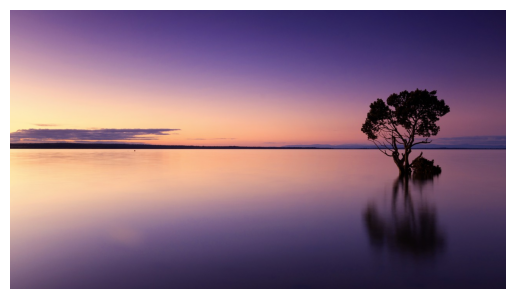

In [13]:
# 다운로드 한 이미지 디스플레이

try:
    import matplotlib.pyplot as plt
    from PIL import Image
except:
    !pip install pillow matplotlib
    import matplotlib.pyplot as plt
    from PIL import Image

image_path = 'image.jpg'

img = Image.open(image_path)
print(type(img))

plt.imshow(img)
plt.axis('off')
plt.show()

# Selenium을 이용한 웹 브라우저 스크래핑
## Selenium이란?
- 자바스크립트를 많이 사용하는 웹 사이트는 웹 브라우저를 사용하지 않을 경우 제대로 동작을 확인할  수 없음.
- 예를 들어, Ajax로 데이터를 나중에 가져오는 페이지의 경우 requests 모듈로는 데이터를 추출할 수 없음.
- 이런 경우 웹 브라우저를 원격으로 조작하는 방식으로 스크래핑을 진행해야 함.
- Selenium은 웹 브라우저를 원격 조작할 때 사용하는 도구로 일반적으로 웹 애플리케이션 테스트를 자동화할 때 사용함.
- Selenium을 이용하면 자동으로 URL 열기, 클릭, 스크롤, 문자 입력 등의 다양한 조작을 자동화 할 수 있음.
- 또한, 화면을 캡쳐하여 이미지로 저장하거나 HTML의 특정 부분을 꺼내는 것도 가능함.
- Chrome, Firefox, Opera 등 다양한 브라우저를 원격 조작할 수 있음.

## 화면 없는 웹 브라우저 헤드리스 사용
- 웹 브라우저를 원격조작할 때마다 웹 브라우저 화면이 뜨면 불편함으로, 일반적으로 헤드리스(화면이 없는) 모드를 사용함.
- 이를 활용하면 명령줄에서 웹 브라우저를 조작할 수 있음.
- Selenium 사용에 필요한 모듈
    - selenium, webdriver_manager 모듈이 설치되어 있어야 함.
    - 최신 버전을 유지하기 위해, pip install --upgrade selenium을 이용할 것.
    - webdriver_manager 모듈을 이용하여 필요할 때마다 브라우저에 맞는 webdriver를 설치할 수 있어 편리함.
    - Chrome 브라우저의 경우, webdriver_manager.chrome.ChromeDriverManager 활용
    - Safari 브라우저의 경우, webdriver_manager.firefox.GeckoDriverManager 활용

## Selenium으로 DOM 요소 선택하기
- DOM 요소를 선택하기 위해 다음 두 함수를 이용하고, By를 통해 선택자를 선택함.
- find_element(By)를 이용함.
    - from selenium.webdriver.common.by import By
    - browser.find_element(By.CSS_SELECTOR, '#id')
    - 결과는 1개의 요소만 찾음.
- find_elements(By)를 이용함.
    - browser.find_element(By.CLASS_NAME, 'divider_1')
    - 결과는 리스트로 여러 개의 요소를 찾음.
    - 여러 개의 요소를 찾을 때는, xpath나 css_selector보다는 tag_name, class_name을 잘 활용하는 것이 중요함.

## Selenium으로 요소 조작하기
- 특정한 DOM 요소를 선택하면 키를 입력하거나 클릭하는 등의 조작을 할 수 있음.
- 다음은 DOM 요소에 사용할 수 있는 메서드와 속성을 나타냄.


| 메서드 또는 속성 | 설명 |
| --- | ---- |
| clear() | 글자를 입력할 수 있는 요소의 글자를 지움 |
| click() | 요소 클릭|
| get_attribute(name) | 요소의 속성 중 name에 해당하는 속성의 값을 추출 |
| is_displayed() | 요소가 화면에 출력되는지 확인|
| is_enabled() | 요소가 활성화돼 있는지 확인 |
| is_selected() | 체크박스 등의 요소가 선택된 상태인지 확인 |
| screenshot(filename) | 스크린샷 |
| send_keys() | 키 입력 |
| submit | 입력 양식 전송 |
| id | 요소의 id 속성 |
| location | 요소의 위치 |
| parent | 부모 요소 |
| size | 요소의 크기 |
| tag_name | 태그 이름 |
| text | 요소 내부의 글자 |

# Colab에서 Selenium 사용하기

## Colab에서 Selenium을 사용하기 위한 사전 작업

- 작성 일자: 2023.11.6.
- 이 과정은 chatgpt가 해결해 주지 못함. 아무래도 최근에 바뀐 웹사이트의 이슈이기 때문에 쉽지 않았을 것.
- 코랩에서 selenium을 사용하려면 설치해야 할 것 3가지: selenium, chromium, chromium-driver!!
- selenium 설치
- chromium, chromium-driver 설치 (코랩은 chrome을 권장하지 않음.)
- 업데이터가 문제가 된 이유
    - 최근 우분투 업데이트로 인해 snap으로만 chromdriver를 설치하게 된 점. apt로는 설치가 더이상 안됨.
    - chromedriver 자동 설치 도구인 chromedrivermanager가 참고하는 download 사이트가 변경된 점.
    - 요 근래 마치 약속이나 한듯이 많이 변함.
- 그래서 아래 코드는 snap을 사용하지 않고도 apt로 chromium과 chromium-driver을 설치하는 방법을 정리한 것.
- 이 reference는 https://tobefreein2040.tistory.com/10 임.
- 만약 local에서 chromedrivermanager를 이용해서 사용하려면, 다음 reference를 참고해 볼 것. https://seong6496.tistory.com/507
- 코랩에서 selenium을 실행하기 전에 아래 두 코드를 실행할 것.

In [ ]:
# 이 부분은 코랩에서 처음 한번만 실행하면 됨.
# 코드 수정 - "The reason is that the last Ubuntu update update supports chromium driver just via snap."
# 최근 우분투 업데이트에서 크롬 드라이버 설치를 snap을 이용해서만 하도록 바뀜
# 고로 snap 없이 설치하는 아래 우회 코드로 변경
# 출처 : https://colab.research.google.com/drive/1cbEvuZOhkouYLda3RqiwtbM-o9hxGLyC
# 출처2 : https://stackoverflow.com/questions/75155063/selenium-use-chrome-on-colab-got-unexpectedly-exited

%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.vtmSzDSmPf/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.WhFZWpvOHH/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.2883rPH3Ds/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://security.ubuntu.com/ubuntu

In [ ]:
# selenium 동작 테스트

import selenium

print(selenium.__version__)

# -*- coding: UTF-8 -*-
import time
from selenium import webdriver
from selenium.webdriver.common.by import By

#Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.

options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(options=options)

#해당 url로 이동
url = "https://www.naver.com/"
driver.get(url)

# 페이지 소스 가져오기 & title 태그 웹 사이트 제목 가져오기
html = driver.page_source
print(html.split("<title>")[1].split("</title>")[0])

driver.quit()

4.31.1
NAVER


## Colab에서 Selenium으로 간단한 스크래핑 구현하기

### queto to scrape 사이트 제목 가져오기

In [ ]:
# -*- coding: UTF-8 -*-
import selenium
import time
from selenium import webdriver
from selenium.webdriver.common.by import By

print(selenium.__version__)

def setup_headless_chrome():
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')        # Head-less 설정
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')

    driver = webdriver.Chrome(options=options)

    return driver


def scrape_website(url):
    driver = setup_headless_chrome()
    driver.get(url)

    # 페이지의 타이틀 출력
    print("Page Title is:", driver.title)

    # 첫 번째 h2 찾기
    header = driver.find_element('xpath', '//h2').text
    print("First Header:", header)

    # WebDriver 종료
    driver.quit()

# 원하는 URL로 변경
url = 'https://quotes.toscrape.com/'
scrape_website(url)


4.31.1
Page Title is: Quotes to Scrape
First Header: Top Ten tags


### 웹사이트 이미지 캡쳐하기

In [ ]:
# for colab

import selenium
import time
from selenium import webdriver
from selenium.webdriver.common.by import By

options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

browser = webdriver.Chrome(options=options)

url = "https://www.naver.com/"
browser.get(url)

# 화면을 캡처해서 저장
browser.save_screenshot("Naver_Website.png")

# 브라우저 종료
browser.quit()

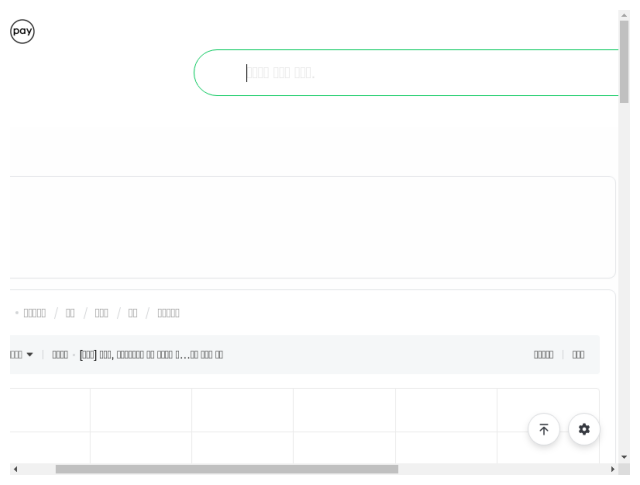

In [ ]:
# 이미지 디스플레이

from PIL import Image
import matplotlib.pyplot as plt

png = Image.open('Naver_Website.png')

plt.figure(figsize=(8, 20))
plt.imshow(png)
plt.axis('off')
plt.show()

#### 연습문제
- 한글 폰트 문제를 해결하고, 제대로 된 웹페이지의 screenshot을 저장하세요.

# Local에서 Selenium 사용하기

## Local에서 Selenium을 사용하기 위한 사전 작업
- Anaconda3 설치
- VS Code, Jupyter Lab, Atom, PyCharm 등 IDE 설치
- (옵션) 가상환경 구축
- Jupyter ipykernel 설치 및 IDE-가상환경 연결

## Local에서 Selenium으로 간단한 스크래핑 구현하기

### For Chrome

In [ ]:
# # selenium, webdriver_manager 모듈 설치하기

# !pip install selenium webdriver_manager
# !pip install --upgrade selenium

In [ ]:
# 실행 시 OSError가 발생하면, 메시지를 잘 읽고, 해당 파일로 접근
# 문제의 파일을 삭제하되, webdriver 이름을 삭제 파일의 이름으로 변경
# 다시 코드를 실행하면 작동할 것. written at 2024.8.12.

from selenium import webdriver # 웹 브라우저를 자동화할 수 있는 객체와 함수 제공
from selenium.webdriver.chrome.service import Service # ChromeDriver와 통신하기 위한 Service 클래스
from webdriver_manager.chrome import ChromeDriverManager # ChromeDriver를 자동으로 설치하고 관리하는 클래스
from selenium.webdriver.chrome.options import Options # Chrome webdriver 생성 시 설정하는 옵션을 관리하는 클래스

def setup_headless_chrome():
    # Chrome 옵션 객체 생성 및 설정
    options = Options()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-gpu')
    options.add_argument('--window-size=1920x1080')

    # ChromeDriverManager를 통해 자동으로 드라이버를 설치하고 서비스 객체 생성
    service = Service(ChromeDriverManager().install())

    # 설정한 옵션과 서비스 객체를 이용하여 Chrome WebDriver 객체 생성
    # 실제 웹 스크래핑을 수행하는 객체
    driver = webdriver.Chrome(service=service, options=options)
    return driver

def scrape_website(url):
    driver = setup_headless_chrome()
    driver.get(url)

    # 페이지의 타이틀 출력
    print("Page Title is:", driver.title)

    # 첫 번째 h2 찾기
    header = driver.find_element('xpath', '//h2').text
    print("First Header:", header)

    # WebDriver 종료
    driver.quit()

# 원하는 URL로 변경
scrape_website('https://quotes.toscrape.com/')


Page Title is: Quotes to Scrape
First Header: Top Ten tags


### For Firefox

In [ ]:
# # selenium, webdriver_manager 모듈 설치하기

# !pip install selenium webdriver_manager
# !pip install --upgrade selenium

In [ ]:
# from selenium import webdriver
# from selenium.webdriver.firefox.service import Service
# from webdriver_manager.firefox import GeckoDriverManager
# from selenium.webdriver.firefox.options import Options

# def setup_headless_firefox():
#     # Firefox 옵션 설정
#     options = Options()
#     options.headless = True
#     options.add_argument('--width=1920')
#     options.add_argument('--height=1080')

#     # GeckoDriverManager를 통해 자동으로 드라이버를 설치하고 서비스를 설정
#     service = Service(GeckoDriverManager().install())

#     # WebDriver 객체 생성
#     driver = webdriver.Firefox(service=service, options=options)
#     return driver

# def scrape_website(url):
#     driver = setup_headless_firefox()
#     driver.get(url)

#     # 페이지의 타이틀 출력
#     print("Page Title is:", driver.title)

#     # 첫 번째 h2 찾기
#     header = driver.find_element('xpath', '//h2').text
#     print("First Header:", header)

#     # WebDriver 종료
#     driver.quit()

# # 원하는 URL로 변경
# scrape_website('https://quotes.toscrape.com/')


### 웹 사이트 이미지로 캡처해보기

In [ ]:
# # for local

# from selenium import webdriver
# from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.chrome.service import Service
# from webdriver_manager.chrome import ChromeDriverManager

# url = "http://www.naver.com/"

# options = Options()
# options.headless = True

# service = Service(ChromeDriverManager().install())

# browser = webdriver.Chrome(service=service, options=options)

# browser.get(url)

# # 화면을 캡처해서 저장
# browser.save_screenshot("Naver_Website.png")

# # 브라우저 종료
# browser.quit()

## 환경변수를 이용하여 민감 정보 불러오기

- 환경설정에서 변수로 등록하고 불러와서 사용할 수 있음.
- 환경변수를 이용한 정보 불러오기
    - .bashrc, .zshrc, .zshenv 등에 아래 명령어로 등록
        - export NAVER_ID='ABZ'
        - export NAVER_PASSWD='abcd1234'
    - 터미널에서 다음 명령어로 zshrc 업데이트
        - source ~/.zshrc
    - 만약 내용을 불러오지 못한다면, 터미널을 끄고 새로운 터미널로 다시 시도해 볼 것.

In [ ]:
# 환경변수를 이용하여 ID, Passwd 가져오기

import os

user = os.getenv('NAVER_ID', '없어?')
passwd = os.getenv('NAVER_PASSWD', '없어?')

print(user)

uranoce27


## (예제) 네이버에 로그인해서 네이버 Pay 잔액 확인하기
- 네이버 ID, Passwd가 필요함.
- 민감한 정보이므로 노출되지 않도록 설정해야 함.
- <b><font color="red">코랩에서 실행 불가능함. 브라우저에 접근하여 CAPTCHA를 설정해야 하는데 코랩에서는 불가능</font></b>

In [ ]:
# for local

# 네이버 로그인 절차가 강화되어 자동입력 방지문자(Captcha)를 입력해야 로그인할 수 있음.
# 먼저, webdriver를 이용하여 비밀번호 입력까지만 실행
# 이후, 자동입력 방지문자는 브라우저 창에서 수작업으로 입력 후 나머지 코드 진행

# Step 1
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

USER = user
PASS = passwd

options = Options()
# options.headless = True
options.add_argument('--no-sandbox')
options.add_argument('--disable-gpu')

service = Service(ChromeDriverManager().install())

browser = webdriver.Chrome(service=service, options=options)

# 로그인 페이지에 접근하기
url_login = "https://nid.naver.com/nidlogin.login"
browser.get(url_login)
print("로그인 페이지에 접근합니다.")

# 텍스트 박스에 아이디와 비밀번호 입력하기
e = browser.find_element(By.ID, "id")
e.clear()
e.send_keys(USER)
e = browser.find_element(By.ID, "pw")
e.clear()
e.send_keys(PASS)

# 입력 양식 전송해서 로그인하기
form = browser.find_element(By.CSS_SELECTOR, "#log\.login")
form.submit()
print("로그인 버튼을 클릭합니다.")


로그인 페이지에 접근합니다.
로그인 버튼을 클릭합니다.


In [ ]:
########################################################
# Step 2
# 브라우저 창에서 비밀번호와 자동입력 방지문자를 수동으로 인력하고 로그인 버튼을 누르세요.

In [ ]:
# 쇼핑 페이지의 데이터 가져오기
import time

browser.get("https://order.pay.naver.com/home?tabMenu=SHOPPING")
time.sleep(1)


In [ ]:
# 네이버페이 링크 가져오기
links = browser.find_elements(By.CLASS_NAME, "PayWalletWidgetItem-module_link-point__6mjma")
link = links[1].get_attribute('href')
browser.get(link)
time.sleep(1)


In [ ]:
# 계좌잔액 출력하기

element = browser.find_elements(By.CSS_SELECTOR, '#__next > div.sc-eqUAAy.ddkHQb > div > div > div > div.wrap-info > div > div > div.PayMoneyAccountInfo_article__haNXA > div > strong')
element[0].text.replace('\n', ': ')


'계좌잔액: 12,629원'

## 연습문제1 - 네이버에 로그인해서 구매한 물건 목록 가져오기
- 쇼핑페이지로 이동하여 구매한 목록 가져오기
    - [쇼핑 페이지 URL](https://order.pay.naver.com/home?tabMenu=SHOPPING)

## 연습문제2 - 네이버 페이 영수증조회.출력하기
> xpath, element, css_selector 등을 잘 선택했음에도 작동하지 않을 때는 로딩 타임을 기다린 후에 진행해보도록 하자.
- 쇼핑페이지에서 시작
    - [쇼핑 페이지 URL](https://order.pay.naver.com/home?tabMenu=SHOPPING)
- 우측 배너에서 영수증조회.출력 클릭
- 현금영주승, 카드영수증, 선불전자영수증 중 하나를 선택하여 받기 누르기
- PDF 형식 받기 누르기